#### imports

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

# Hiyerarşik Kümeleme

## Model

In [3]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [9]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

In [10]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [13]:
# görselleştirme

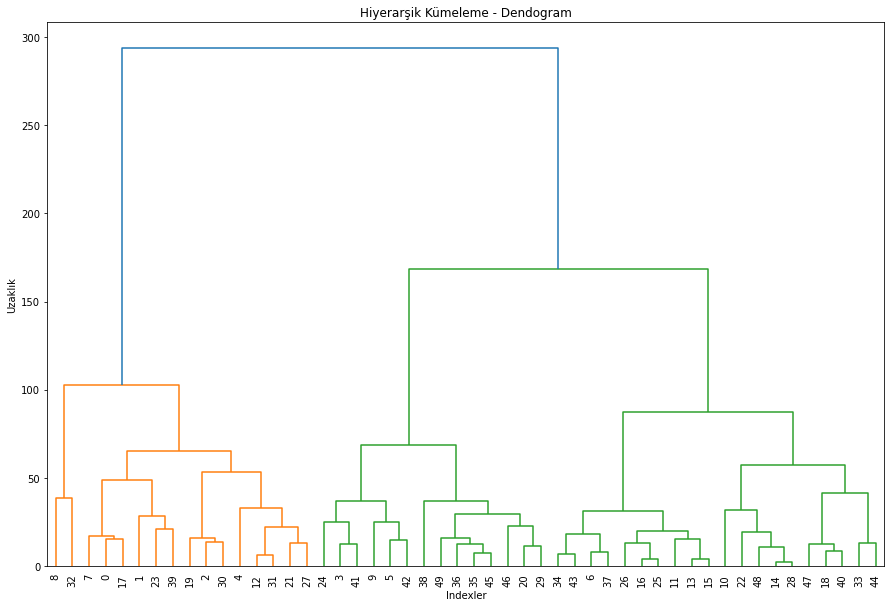

In [12]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

Ben bu görselin hepsini görmek istemiyorum, merge edilen clusterlar üzerinde bunu görmek istiyorum? (birşelen kümeleri görmek)

Yani yukarıdaki gibi her bir sonuç nerede değil de daha gruplanmış şekilde bir sonuca ulaşmak istersem:

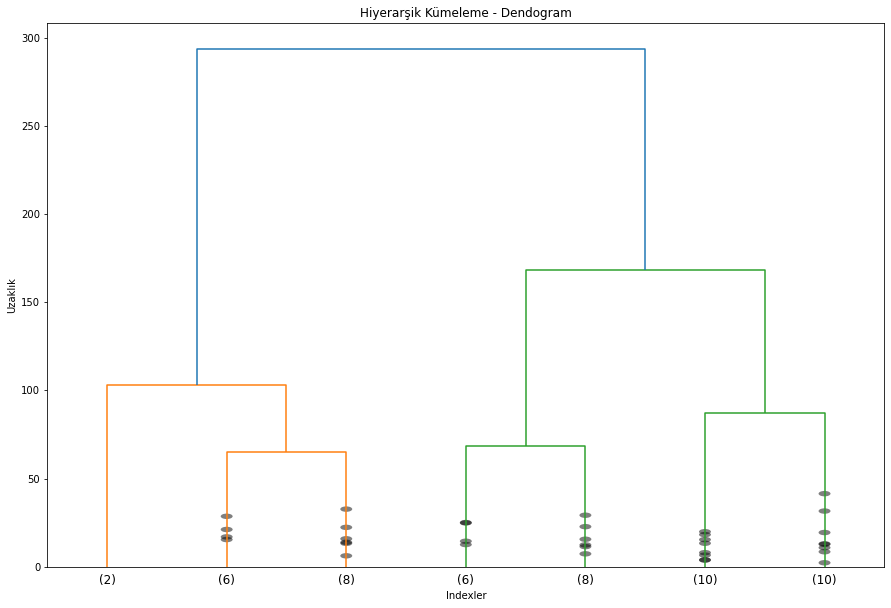

In [17]:
plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 7,
    show_contracted = "True"
);

## Optimum Küme Sayısını

In [18]:
# optimum küme sayısını bulma ve gözlemlerin hangi gruba ait olduğuna vesaire ulaşma

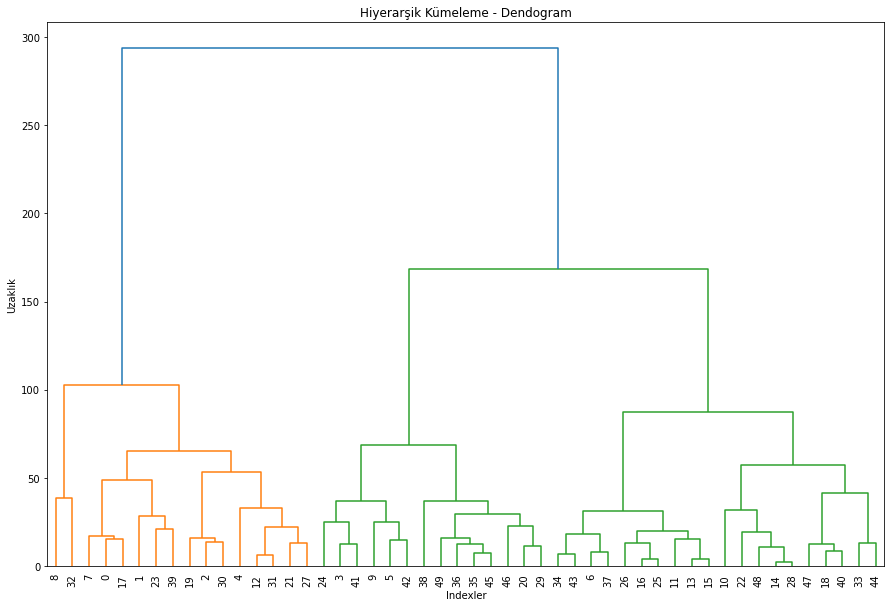

In [20]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

#### Burada leaf_font_size isimli argümanı bilmiyorsak ve bi yerde denk geldik, ne olduğunu öğrenmek istiyorsak ne yapmalıyız?

Bazen nesneyi değişken olarak kaydedip arayınca çıkar (burada çıkmadı) bazen de direkt Object'i arayınca çıkar. İkisinde de olmazsa kütüphaneye gidip oradan dökümantasyonu okuyabiliriz. 

In [21]:
?den

Type:        dict
String form: {'icoord': [[5.0, 5.0, 15.0, 15.0], [35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [65.0, 65 <...>  'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2']}
Length:      6
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)


In [23]:
?dendrogram

Signature:
dendrogram(
    Z,
    p=30,
    truncate_mode=None,
    color_threshold=None,
    get_leaves=True,
    orientation='top',
    labels=None,
    count_sort=False,
    distance_sort=False,
    show_leaf_counts=True,
    no_plot=False,
    no_labels=False,
    leaf_font_size=None,
    leaf_rotation=None,
    leaf_label_func=None,
    show_contracted=False,
    link_color_func=None,
    ax=None,
    above_threshold_color='C0',
)
Docstring:
Plot the hierarchical clustering as a dendrogram.

The dendrogram illustrates how each cluster is
composed by drawing a U-shaped link between a non-singleton
cluster and its children. The top of the U-link indicates a
cluster merge. The two legs of the U-link indicate which clusters
were merged. The length of the two legs of the U-link represents
the distance between the child clusters. It is also the
cophenetic distance between original observations in the two
children clusters.

Parameters
----------
Z : ndarray
    The linkage matrix encodi

#### -----------------

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

In [25]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": cluster.fit_predict(df)})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [26]:
df["kume_no"] = cluster.fit_predict(df)

In [27]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


In [28]:
# yani genel olarak göz yordamıyla karar veriyoruz denebilir.